In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [4]:
X_train /= 255
X_test /= 255

In [5]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model_log = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 322s 822ms/step - loss: 1.6371 - accuracy: 0.3970 - val_loss: 1.2306 - val_accuracy: 0.5586
Epoch 2/10
391/391 [==============================] - 315s 805ms/step - loss: 1.1571 - accuracy: 0.5897 - val_loss: 0.9781 - val_accuracy: 0.6559
Epoch 3/10
391/391 [==============================] - 318s 814ms/step - loss: 0.9635 - accuracy: 0.6636 - val_loss: 0.8423 - val_accuracy: 0.7099
Epoch 4/10
391/391 [==============================] - 328s 839ms/step - loss: 0.8479 - accuracy: 0.7008 - val_loss: 0.7697 - val_accuracy: 0.7370
Epoch 5/10
391/391 [==============================] - 315s 806ms/step - loss: 0.7660 - accuracy: 0.7335 - val_loss: 0.7346 - val_accuracy: 0.7455
Epoch 6/10
391/391 [==============================] - 322s 824ms/step - loss: 0.6909 - accuracy: 0.7595 - val_loss: 0.7063 - val_accuracy: 0.7579
Epoch 7/10
391/391 [==============================] - 330s 845ms/step - loss: 0.6470 - accuracy: 0.7732 - val_loss: 0.6965 -

In [8]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.6650
Test Accuracy: 77.61%


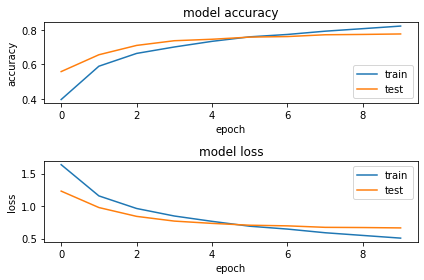

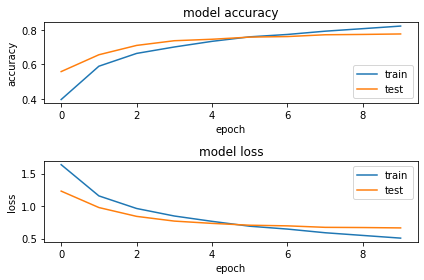

In [9]:
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig